In [70]:
import SI_model as si
import matplotlib.pyplot as plt
import network_unpack as nu
import network_manipulation as nm
import SI_model_nx as sinx
import networkx as nx
import numpy as np
import scipy.optimize as spo
import scipy.stats as sps

dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

0
1
2
3
4
5
6
7


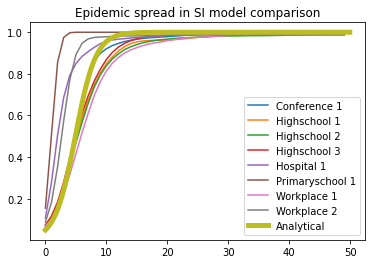

In [13]:
T = 50 # days over which we simulate
I = 0.05 # initial infected fraction
b = 0.6 # transmission rate of contagion
M = 100 # number of runs to smooth model over
threshold = 0.1

c = si.integration_const(I)

#model_SI = si.smooth_SI(N, I, T, M, h, threshold) # takes T as input needs to be consistent with analytical
#model_SI.append(1) # temporary fix to make dimension of x and y match for plotting

networks = []

for i in range(len(dataset_paths)):
    networks.append(nu.build_network(dataset_paths[i]))

models = []
for i in range(len(dataset_names)): 
    model_SI = si.smooth(networks[i], T, I, threshold, M)
    models.append(model_SI)
    print(i)


plt.figure()

t = si.generate_t(T, 1)
for i in range(len(dataset_names)): 
    plt.plot(t, models[i], label = dataset_names[i])

h = 0.1
t = si.generate_t(T, h)
analytic_SI = si.analytic_sol(t, b, c) # should be correct ...
plt.plot(t, analytic_SI, linewidth = 5, label = 'Analytical')

plt.legend(loc = 'lower right')
plt.title('Epidemic spread in SI model comparison')
plt.show()

MODEL V2 IS FAR FAR SUPERIOR LETS GOOOOOOOO

In [23]:
# Testing network manipulation library part 2

import network_manipulation as nm

path = 'Sociopatterns datasets/conference_2009.dat_'

n = nm.build_network(path)
#print(n['1467'])
    
size = nm.find_size(n)
#print(size)

cons = nm.find_connections(n)
#print(cons[0])

strs = nm.find_strengths(n)
#print(strs[0])
    
time = nm.find_time(path)
#print(time)

G = nm.build_nxgraph(path)
#print(G['1467'])

# Works as intended alhamdullilah

In [1]:
import SI_model as si
import network_manipulation as nm

path = 'Sociopatterns datasets/conference_2009.dat_'
G = nm.build_nxgraph(path)
print(G.nodes['1467'])
G = si.initialise_potential(G, 0.5, 5)
print(G.nodes['1467'])

# This is trying to use a networkx graph with functions not designed for it

{}


AttributeError: 'Graph' object has no attribute 'keys'

In [48]:
# Just looking into G to gain an understanding of how networkx graphs work

print(list(G.neighbors('1467')))

print(G['1467'])
print(list(G.nodes['1467']))
G.nodes['1467']['potential'] = 0
print(G.nodes['1467'])

print(G.edges['1467', '1591']['weight'])
print(G['1467']['1591']['weight'])

print(list(G['1467'].keys()))

['1591', '1513', '1527', '1504', '1531', '1493', '1495', '1477', '1519', '1476', '1529', '1535', '1562', '1700', '1842', '1858', '1769', '1443', '1461', '1644', '1740', '1581', '1572', '1757', '1911', '1711', '1626', '1630', '1761', '1698', '1707', '1441', '1552', '1683', '1825', '1904', '1603', '1905', '1688', '1712', '1458', '1831', '1706', '1566', '1807', '1453', '1582', '1829', '1888', '1805', '1775', '1920', '1835', '1448', '1766', '1428', '1890', '1438', '1692', '1897', '1602', '1791', '1543', '1466', '1427', '1658', '1731', '1877', '1663']
{'1591': {'weight': 0.013934426229508197}, '1513': {'weight': 0.001639344262295082}, '1527': {'weight': 0.000819672131147541}, '1504': {'weight': 0.02540983606557377}, '1531': {'weight': 0.003278688524590164}, '1493': {'weight': 0.006557377049180328}, '1495': {'weight': 0.018032786885245903}, '1477': {'weight': 0.000819672131147541}, '1519': {'weight': 0.001639344262295082}, '1476': {'weight': 0.000819672131147541}, '1529': {'weight': 0.000819

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


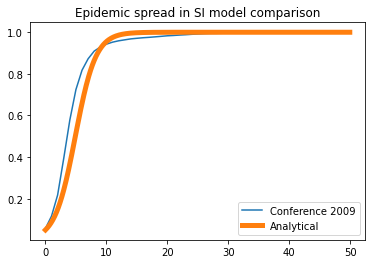

In [21]:
T = 50 # days over which we simulate
I = 0.05 # initial infected fraction
b = 0.6 # transmission rate of contagion
M = 20 # number of runs to smooth model over
threshold = 0.1

c = sinx.integration_const(I)

path = dataset_paths[0]
G = nm.build_nxgraph(path)
model_SI = sinx.smooth(G, I, threshold, T, M)

plt.figure()
t = sinx.generate_t(T, 1)
plt.plot(t, model_SI, label = 'Conference 2009')

h = 0.1 # increment
t = sinx.generate_t(T, h)
analytic_SI = sinx.analytic_sol(t, b, c) # should be correct ...
plt.plot(t, analytic_SI, linewidth = 5, label = 'Analytical')

plt.legend(loc = 'lower right')
plt.title('Epidemic spread in SI model comparison')
plt.show()

In [2]:
# Testing visualisation

import network_visualisation as nv
import network_manipulation as nm

path = 'Sociopatterns datasets/conference_2009.dat_'
G = nm.build_nxgraph(path)
nv.collect_frames_nx(G, 0.05, 0.1, 50)
frames = nv.make_gif()

# Works as intended!! 

<Figure size 864x576 with 0 Axes>

In [ ]:
# Testing network manipulation library part 3

import network_manipulation as nm
import matplotlib.pyplot as plt
import numpy as np

path = dataset_paths[1]


n = nm.build_network(path)

dd = nm.degree_dist(n)
#print(dd)

dd_avg, dd_std = nm.degree_dist_stats(dd)
print('Original degree dist')
print(dd_avg)
print(dd_std)
plt.figure()
plt.title('Original degree dist')
plt.hist(dd, bins = 15, density = 1)


gdd = nm.generate_degree_dist(dd_avg, dd_std, 10000)
gdd_avg, gdd_std = nm.degree_dist_stats(gdd)
'''
print('\nGenerated from original')
print(gdd_avg)
print(gdd_std)
plt.figure()
plt.title('Generated from original')
plt.hist(gdd, bins = 20)
'''

gdd.sort()

gdd = np.array(gdd)
gdd = np.rint(gdd)
ind = np.where(gdd == 0)
gdd_truncated = gdd[ind[0][0]:]
plt.figure()
plt.title('Truncated generation')
plt.hist(gdd_truncated, bins = 15, density = 1)



dd_log = np.log(np.array(dd))
dd_log_avg, dd_log_std = nm.degree_dist_stats(dd_log)
print('\nLog degree dist')
print(dd_log_avg)
print(dd_log_std)
plt.figure()
plt.title('Log of original')
plt.yscale('log')
plt.hist(dd_log, bins  = 15, density = 1)


gdd_log = nm.generate_degree_dist(dd_log_avg, dd_log_std, 10000)
gdd_log_avg, gdd_log_std = nm.degree_dist_stats(gdd_log)
print('\nGenerated from log')
print(gdd_log_avg)
print(gdd_log_std)
plt.figure()
plt.title('Generation from log')
plt.hist(gdd_log, bins = 15, density = 1)

def compare_generation():
    '''
    plots and compares different generation methods
    '''
    return True


#Poor matching of generated and original - perhaps test model performance
# and see if there is a difference as if not this solution will still work



# This sucks. Working on this rn.

In [ ]:
# Quickly prototyping if poisson is a good fit for data
# conclusion: it is not

for i in range(len(dataset_paths)):
    path = dataset_paths[i]
    n = nm.build_network(path)
    dd = nm.degree_dist(n)
    dd_avg, dd_std = nm.degree_dist_stats(dd)
    #print(dataset_names[i])
    plt.figure()
    vals, edges, _ = plt.hist(dd)
    #print(edges)
    #print(vals)
    plt.figure()
    poisson_test = np.random.poisson(dd_avg, 1000)
    plt.hist(poisson_test)
    
    

Conference 1 has 403 nodes
Highschool 1 has 126 nodes
Highschool 2 has 180 nodes
Highschool 3 has 327 nodes
Hospital 1 has 75 nodes
Primaryschool 1 has 242 nodes
Workplace 1 has 92 nodes
Workplace 2 has 217 nodes


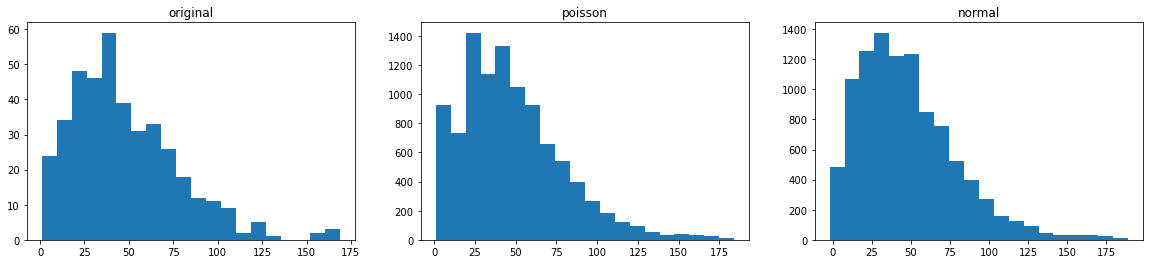

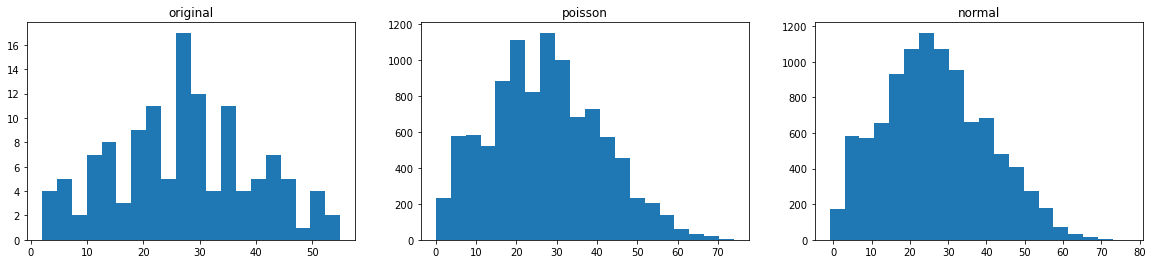

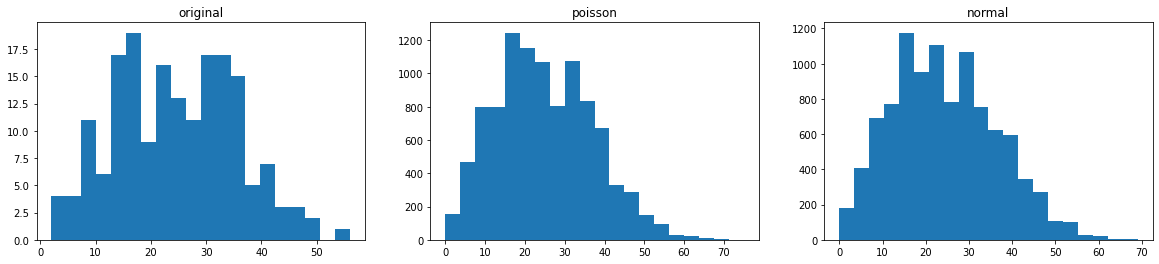

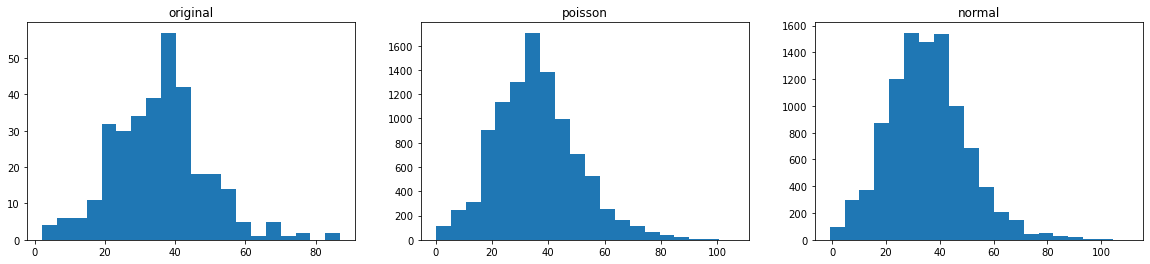

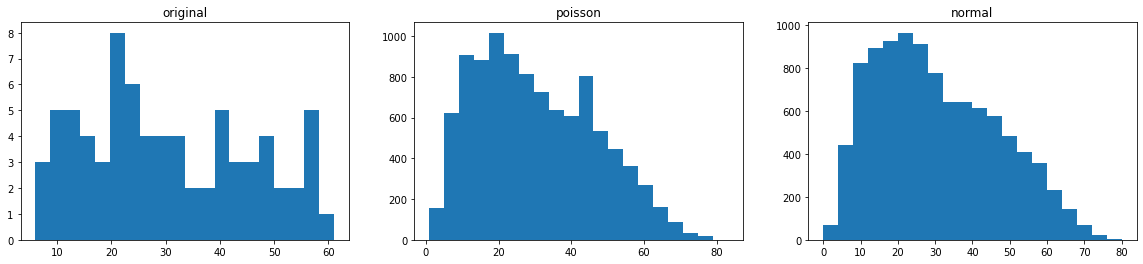

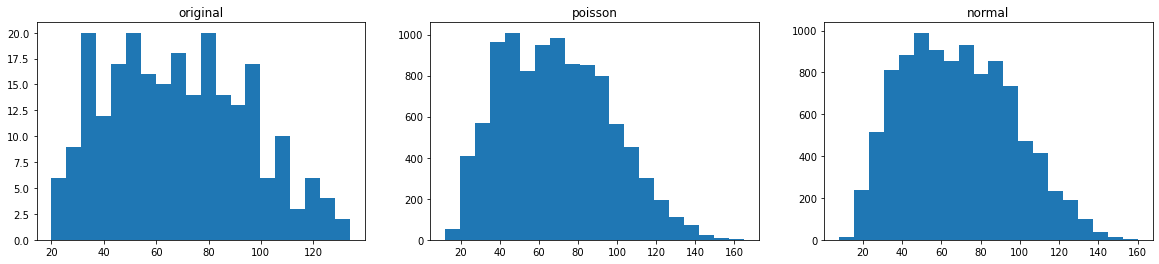

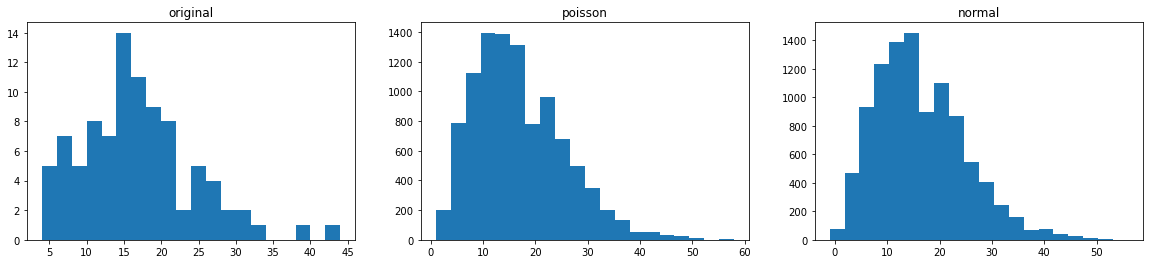

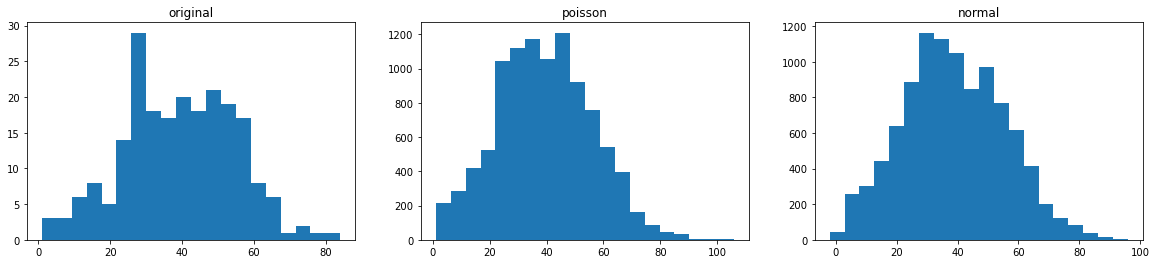

In [6]:
def scale_degree_dist_poisson(freqs, edges, length):
    midpoints = edges[:-1] + np.diff(edges)/2    
    scale = length / sum(freqs)
    degrees = []
    for i in range(len(freqs)):
        poisson = np.random.poisson(midpoints[i], int(freqs[i] * scale))
        for p in poisson:    
            degrees.append(int(p))
    return degrees
            
            
def scale_degree_dist_normal(freqs, edges, length):
    midpoints = edges[:-1] + np.diff(edges)/2    
    scale = length / sum(freqs)
    degrees = []
    for i in range(len(freqs)):
        normal = np.random.normal(midpoints[i], np.sqrt(midpoints[i]), int(freqs[i] * scale))
        for n in normal:    
            degrees.append(int(n))
    return degrees


for i in range(len(dataset_paths)):
    path = dataset_paths[i]
    n = nm.build_network(path)
    dd = nm.degree_dist(n)
    print(dataset_names[i] + ' has ' + str(len(dd)) + ' nodes')
    #dd_avg, dd_std = nm.degree_dist_stats(dd)

    vals, edges = np.histogram(dd)
    
    figure, axis = plt.subplots(1, 3)
    figure.set_figwidth(20)
    axis[0].hist(dd, bins = 20)
    axis[0].set_title('original')

    poisson_dist = scale_degree_dist_poisson(vals, edges, 10000)
    axis[1].hist(poisson_dist, bins = 20)
    axis[1].set_title('poisson')
    
    normal_dist = scale_degree_dist_normal(vals, edges, 10000)
    axis[2].hist(normal_dist, bins = 20)
    axis[2].set_title('normal')


#07943

# Conclusion: looks like normal works better!

# Need to make weighting for this also!!

    

In [167]:
# For generation with normal distribution compares different std calculations

path = dataset_paths[0]
n = nm.build_network(path)
dd = nm.degree_dist(n)
vals, edges = np.histogram(dd, bins = 8)

check = []
for i in range(len(vals)):
    bin_vals = [x for x in dd if edges[i]<=x<=edges[i+1]] # this leads to slight overcounting but will not fix right now as not mission critical
    print(i)
    if len(bin_vals) > 0:
        std = np.std(bin_vals)
    else:
        std = np.sqrt(vals[i])
        print(bin_vals)
        print(std)
    check+=bin_vals


if check == dd:
    print('maintained')
    
# experiement shows that simple sqrt does not give the sam estd than an actuak calculation, which is more accurate whne finding std

# Not ideal as this will run into problems when there are no values in a certain bin! best approach is to try to fit a function and sample accordin to that

# simple std will suffice for now.

# work on building the weights and the network.


0
1
2
3
4
5
6
7


47272
0
1
2
3
4
5
6
7
8
9


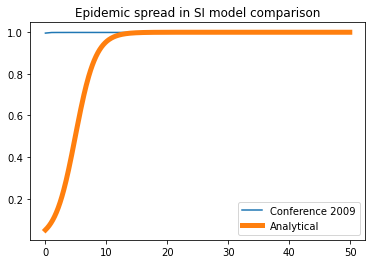

In [10]:
# Testing scaled up graph with SI model - poor results as no weighting

path = dataset_paths[0]
n = nm.build_network(path)
dd = nm.degree_dist(n)

vals, edges = np.histogram(dd)
normal_dist = scale_degree_dist_normal(vals, edges, 1000)
print(sum(normal_dist))
scaled_G = nx.configuration_model(normal_dist)

'''
for n in list(scaled_G.nodes):
    for c in list(scaled_G.neighbors(n)):
        scaled_G.edges[n][c][0]['weight'] = 1
'''
nx.set_edge_attributes(scaled_G, 1, "weight") # blanket setting all weights to 1 to make this slapdash solution work with same code

T = 50 # days over which we simulate
I = 0.05 # initial infected fraction
b = 0.6 # transmission rate of contagion
M = 10 # number of runs to smooth model over
threshold = 0.1

plt.figure()
t = sinx.generate_t(T, 1)
model_SI = sinx.smooth(scaled_G, I, threshold, T, M)
plt.plot(t, model_SI, label = 'Conference 2009')

h = 0.1 # increment
t = sinx.generate_t(T, h)
c = sinx.integration_const(I)
analytic_SI = sinx.analytic_sol(t, b, c) # should be correct ...
plt.plot(t, analytic_SI, linewidth = 5, label = 'Analytical')

plt.legend(loc = 'lower right')
plt.title('Epidemic spread in SI model comparison')
plt.show()

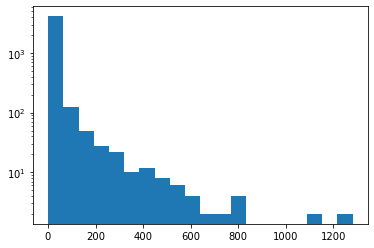

In [262]:
#path = 'Sociopatterns datasets/conference_2009.dat_'
G = nm.build_nxgraph(dataset_paths[2], False)

#print(G['1467']['1591']['weight'])

def analyse_graph(graph):
    weights = []
    degrees = []
    for node in graph.nodes:
        connections = graph.neighbors(node)
        degrees.append(graph.degree[node])
        weight = []
        for connection in connections:
            weight.append(graph[node][connection]['weight'])
        weights += weight
    return degrees, weights
            
d, w = analyse_graph(G)

plt.hist(w, bins = 20)
plt.yscale('log')
plt.xscale('linear')

# make a scheme to find how weights change with degree size?
# simple solution is to aggregrate all weights use that to infortm a prob dist
# and sample from that as needed

# loooks like a 1/x dist on a lin - log plot


In [229]:
def linear_binning(data, num_bins = 100): 
    '''
    finds midpoints and frequencies of data after binning, removes any zeros
    present in the data
    
    parameters: weights:    array
                            contains all weights present in a graph
    
    returns:    midpoints:  array
                            midpoints of histogram bins
                freqs:      array
                            frequecies of histogram bins
    '''                     
    freqs, edges = np.histogram(data, bins = num_bins, density = 0)
    midpoints = edges[:-1] + np.diff(edges)/2    
    to_remove = np.where(freqs == 0)[0]
    midpoints = np.delete(midpoints, to_remove)
    freqs = np.delete(freqs, to_remove)
    return midpoints, freqs

def log_binning(data, scale = 1.2, normed = True): # err = np.sqrt
    if scale <= 1:
        raise ValueError('Function requires scale > 1')
    
    if normed:
        start = min(data)
        count = 0 # keeps track of how many orders of magnitude we need to increase to get start to be greater than 1
        while start < 1:
            start = start * 10
            count += 1
        end  = 10 ** count
        bin_edges = [0, start]
        while bin_edges[-1] < end:
            bin_edges.append(bin_edges[-1] ** scale)
        bin_edges = np.array(bin_edges) / end
    
    else:
        end = max(data)
        ##start = 1
        #bin_edges = [0, start]
        #while bin_edges[-1] < end:
        #    bin_edges.append(bin_edges[-1] ** scale)
        #bin_edges = np.array(bin_edges)
        
        wmax = np.ceil(np.log(end) / np.log(scale))
        bin_edges = scale ** np.arange(1,wmax + 1)
        
        #print(bin_edges)
    freqs, edges = np.histogram(data, bins = bin_edges, density = 0)
    midpoints = edges[:-1] + np.diff(edges)/2    
    
    to_remove = np.where(freqs == 0)[0]
    midpoints = np.delete(midpoints, to_remove)
    freqs = np.delete(freqs, to_remove)
    stds = [np.sqrt(freq) for freq in freqs]

    return midpoints[0:], freqs[0:], stds[0:]
    
def log_binning_v2(data, scale = 1.2, normed = True): # err = np.std
    if scale <= 1:
        raise ValueError('Function requires scale > 1')
    
    if normed:
        start = min(data)
        count = 0 # keeps track of how many orders of magnitude we need to increase to get start to be greater than 1
        while start < 1:
            start = start * 10
            count += 1
        end  = 10 ** count
        bin_edges = [0, start]
        while bin_edges[-1] < end:
            bin_edges.append(bin_edges[-1] ** scale)
        bin_edges = np.array(bin_edges) / end
    
    else:
        end = max(data)
        wmax = np.ceil(np.log(end) / np.log(scale))
        bin_edges = scale ** np.arange(1,wmax + 1)
    
    data = np.array(data)
    bin_vals = []
    freqs = []
    for i in range(len(bin_edges)-1):
        bin_vals.append(data[(data>bin_edges[i])*(data<bin_edges[i+1])])
        freqs.append(len(bin_vals[i]))
    
    stds = np.array([np.std(bin_val) for bin_val in bin_vals])
    midpoints = np.array(bin_edges[:-1] + np.diff(bin_edges)/2)
    freqs = np.array(freqs)    
    
    to_remove = np.where(freqs == 0)[0]
    midpoints = np.delete(midpoints, to_remove)
    freqs = np.delete(freqs, to_remove)
    stds = np.delete(stds, to_remove)

    return midpoints[0:], freqs[0:], stds[0:]

def log_binning_v3(data, scale = 1.2, normed = True): # err = 1 / np.sqrt
    if scale <= 1:
        raise ValueError('Function requires scale > 1')
    
    if normed:
        start = min(data)
        count = 0 # keeps track of how many orders of magnitude we need to increase to get start to be greater than 1
        while start < 1:
            start = start * 10
            count += 1
        end  = 10 ** count
        bin_edges = [0, start]
        while bin_edges[-1] < end:
            bin_edges.append(bin_edges[-1] ** scale)
        bin_edges = np.array(bin_edges) / end
    else:
        end = max(data)
        wmax = np.ceil(np.log(end) / np.log(scale))
        bin_edges = scale ** np.arange(1,wmax + 1)
    
    freqs, edges = np.histogram(data, bins = bin_edges, density = 0)
    midpoints = edges[:-1] + np.diff(edges)/2    
    
    to_remove = np.where(freqs == 0)[0]
    midpoints = np.delete(midpoints, to_remove)
    freqs = np.delete(freqs, to_remove)
    stds = [1 / np.sqrt(freq) for freq in freqs]

    return midpoints[0:], freqs[0:], stds[0:]

def log_binning_v4(data, scale = 1.2, normed = True): # np.std / np.sqrt
    if scale <= 1:
        raise ValueError('Function requires scale > 1')
    
    if normed:
        start = min(data)
        count = 0 # keeps track of how many orders of magnitude we need to increase to get start to be greater than 1
        while start < 1:
            start = start * 10
            count += 1
        end  = 10 ** count
        bin_edges = [0, start]
        while bin_edges[-1] < end:
            bin_edges.append(bin_edges[-1] ** scale)
        bin_edges = np.array(bin_edges) / end
    
    else:
        end = max(data)
        wmax = np.ceil(np.log(end) / np.log(scale))
        bin_edges = scale ** np.arange(1,wmax + 1)
    
    data = np.array(data)
    bin_vals = []
    freqs = []
    for i in range(len(bin_edges)-1):
        bin_vals.append(data[(data>bin_edges[i])*(data<bin_edges[i+1])])
        freqs.append(len(bin_vals[i]))
    
    stds = np.array([np.std(bin_val)/np.sqrt(freqs[i]) for i, bin_val in enumerate(bin_vals)])
    midpoints = np.array(bin_edges[:-1] + np.diff(bin_edges)/2)
    freqs = np.array(freqs)    
    
    to_remove = np.where(freqs == 0)[0]
    midpoints = np.delete(midpoints, to_remove)
    freqs = np.delete(freqs, to_remove)
    stds = np.delete(stds, to_remove)

    return midpoints[0:], freqs[0:], stds[0:]

def log_binning_v5(data, scale = 1.2, normed = True):
    if scale <= 1:
        raise ValueError('Function requires scale > 1')
    
    if normed:
        start = min(data)
        count = 0 # keeps track of how many orders of magnitude we need to increase to get start to be greater than 1
        while start < 1:
            start = start * 10
            count += 1
        end  = 10 ** count
        bin_edges = [0, start]
        while bin_edges[-1] < end:
            bin_edges.append(bin_edges[-1] ** scale)
        bin_edges = np.array(bin_edges) / end
    
    else:
        end = max(data)        
        wmax = np.ceil(np.log(end) / np.log(scale))
        bin_edges = scale ** np.arange(1,wmax + 1)
        
    freqs, edges = np.histogram(data, bins = bin_edges, density = 0)
    midpoints = edges[:-1] + np.diff(edges)/2    
    
    to_remove = np.where(freqs == 0)[0]
    midpoints = np.delete(midpoints, to_remove)
    freqs = np.delete(freqs, to_remove)
    stds = [1 for freq in freqs]
    
    return midpoints[0:], freqs[0:], stds[0:]

[23.280893453645632, 24.61706725018234, 21.02379604162864, 17.663521732655695, 13.92838827718412, 9.797958971132712, 8.366600265340756, 6.0, 2.449489742783178]


[  0.49479529   1.34270308   2.83558454   5.84028538  13.14078384
  25.8638177   57.35769614 119.71983756 190.29100522]


[0.04295367795875577, 0.04062222318511938, 0.047565149415449405, 0.05661385170722978, 0.07179581586177382, 0.10206207261596577, 0.11952286093343936, 0.16666666666666666, 0.4082482904638631]


[2.12532773e-02 5.45435844e-02 1.34875003e-01 3.30641050e-01
 9.43453297e-01 2.63971484e+00 6.85555594e+00 1.99533063e+01
 7.76859776e+01]


[1, 1, 1, 1, 1, 1, 1, 1, 1]


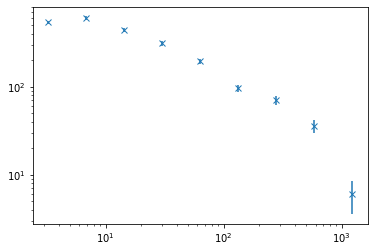

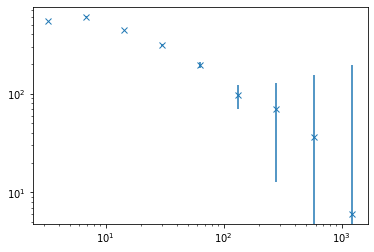

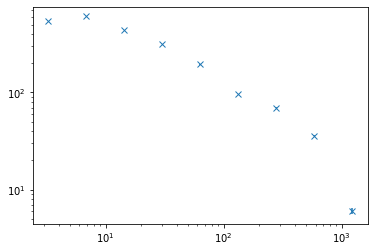

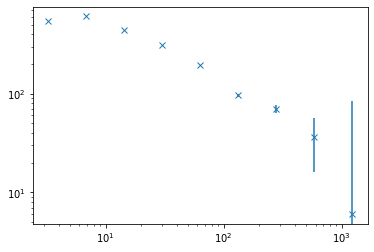

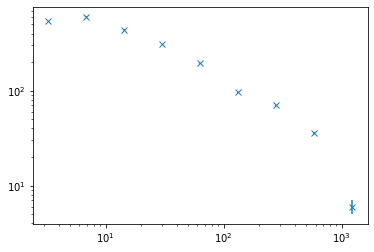

In [230]:
# Testing different error schemes

plt.figure()
x, y, e = log_binning(w, 2.1, False)
plt.errorbar(x, y, yerr = e, fmt = 'x')
plt.yscale('log')
plt.xscale('log')
print(e)

plt.figure()
x, y, e = log_binning_v2(w, 2.1, False)
plt.errorbar(x, y, yerr = e, fmt = 'x')
plt.yscale('log')
plt.xscale('log')
print('\n')
print(e)

plt.figure()
x, y, e = log_binning_v3(w, 2.1, False)
plt.errorbar(x, y, yerr = e, fmt = 'x')
plt.yscale('log')
plt.xscale('log')
print('\n')
print(e)

plt.figure()
x, y, e = log_binning_v4(w, 2.1, False)
plt.errorbar(x, y, yerr = e, fmt = 'x')
plt.yscale('log')
plt.xscale('log')
print('\n')
print(e)

plt.figure()
x, y, e = log_binning_v5(w, 2.1, False)
plt.errorbar(x, y, yerr = e, fmt = 'x')
plt.yscale('log')
plt.xscale('log')
print('\n')
print(e)

# v4 Based on:
# https://math.stackexchange.com/questions/504288/what-situation-calls-for-dividing-the-standard-deviation-by-sqrt-n
# V4 seems to be the best approach, this also leads to the lowest error 

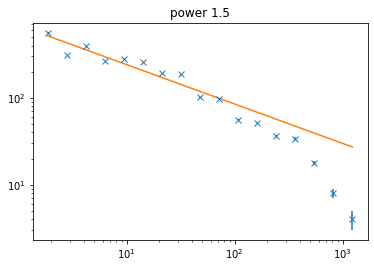

[ 6.86946558e+02 -4.53783959e-01]
[8.41370901 9.99639102]


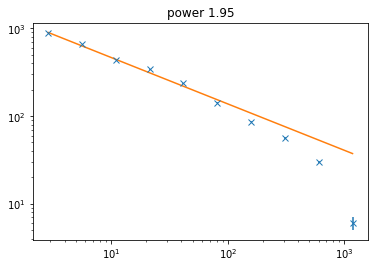

[ 1.57306985e+03 -5.29281236e-01]
[4.35103697 4.26785925]


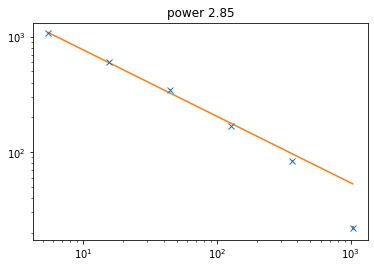

[ 2.90427053e+03 -5.76938881e-01]
[4.7084176  3.56733877]


In [266]:
def linear(x, m, c):
    return m*x + c

def reciprocal(x, a, b, c):
    return a/(x**b) + c

def exponential(x, a, b):
    return b*np.exp(x*a)

def logarithm(x, a, b):
    return a * np.log(x) + b

def power(x, a, b):
    return a * ((x)**b)

def custom_func(x, a, b, c, d):
    return power(x, a, b) * exponential(x, c, d)

def check_fit(fit_func, bin_func, data, scale, normed, plot_scale = 'linear'):
    x, y, e = bin_func(data, scale, normed)
    fit, cov = spo.curve_fit(fit_func, x, y, absolute_sigma = 0)
    xx = np.linspace(min(x), max(x), 10000)
    
    plt.figure()
    plt.title(fit_func.__name__ + ' ' + str(scale))
    plt.errorbar(x, y, yerr = e, fmt = 'x')
    plt.plot(xx, fit_func(xx, *fit))
    plt.yscale(plot_scale)
    plt.xscale(plot_scale)
    plt.show()
    
    err = np.sqrt(np.diag(cov))
    perr = abs(err * 100 / np.array(fit))
    print(fit)
    print(perr)
    

#check_fit(reciprocal, linear_binning, w, 'log')
#check_fit(linear, linear_binning, w, 'log')
#check_fit(exponential, linear_binning, w, 'log')
#check_fit(power, linear_binning, w, 'log')


#check_fit(linear, log_binning, w, 'log')
#check_fit(reciprocal, log_binning, w, 'log')
#check_fit(exponential, log_binning, w, 'log')
#check_fit(power, log_binning, w, 'log') # the hopeful one
#check_fit(power, log_binning_v2, w, 'log') # somehow completely broken
#check_fit(power, log_binning_v3, w, 'log') # very very dead
#check_fit(power, log_binning_v4, w, 'log') # just dead
#check_fit(logarithm, log_binning, w, 'log')

'''
for i in range(15, 26):
    check_fit(power, log_binning, w, i/10, False, 'log')
'''

'''
#scale  = 2.8 works best!
check_fit(power, log_binning_v2, w, 2.1, False, 'log')
check_fit(power, log_binning_v2, w, 2.3, False, 'log')
check_fit(power, log_binning_v2, w, 2.5, False, 'log')
check_fit(power, log_binning_v2, w, 2.6, False, 'log')
check_fit(power, log_binning_v2, w, 2.75, False, 'log')
check_fit(power, log_binning_v2, w, 2.8, False, 'log')
check_fit(power, log_binning_v2, w, 2.85, False, 'log')
check_fit(power, log_binning_v2, w, 2.9, False, 'log')
'''

'''
for i in range(15, 26):
    check_fit(power, log_binning, w, i/10, False, 'log')
    
for i in range(15, 26):
    check_fit(power, log_binning_v3, w, i/10, False, 'log')


for i in range(28, 29):
    check_fit(power, log_binning_v2, w, i/10, False, 'log')
    check_fit(power, log_binning_v4, w, i/10, False, 'log')
'''

'''
for i in range(11, 30):
    check_fit(power, log_binning_v5, w, i/10, False, 'log')
'''

check_fit(power, log_binning_v5, w, 1.5, False, 'log')
check_fit(power, log_binning_v5, w, 1.95, False, 'log')
check_fit(power, log_binning_v5, w, 2.85, False, 'log')


# at best im getting parameter errors of about 25% on average
# I believe this indicates a poor fit, back to the drawing board i suppose
# or should i just use it for now ...


# This has improved to about 4% if I ignore some parameters e.g. intercept
# in the exponential function.

In [ ]:
def logbin(data, scale = 1., zeros = False):
    """
    logbin(data, scale = 1., zeros = False)

    Log-bin frequency of unique integer values in data. Returns probabilities
    for each bin.

    Array, data, is a 1-d array containing full set of event sizes for a
    given process in no particular order. For instance, in the Oslo Model
    the array may contain the avalanche size recorded at each time step. For
    a complex network, the array may contain the degree of each node in the
    network. The logbin function finds the frequency of each unique value in
    the data array. The function then bins these frequencies in logarithmically
    increasing bin sizes controlled by the scale parameter.

    Minimum binsize is always 1. Bin edges are lowered to nearest integer. Bins
    are always unique, i.e. two different float bin edges corresponding to the
    same integer interval will not be included twice. Note, rounding to integer
    values results in noise at small event sizes.

    Parameters
    ----------

    data: array_like, 1 dimensional, non-negative integers
          Input array. (e.g. Raw avalanche size data in Oslo model.)

    scale: float, greater or equal to 1.
          Scale parameter controlling the growth of bin sizes.
          If scale = 1., function will return frequency of each unique integer
          value in data with no binning.

    zeros: boolean
          Set zeros = True if you want binning function to consider events of
          size 0.
          Note that output cannot be plotted on log-log scale if data contains
          zeros. If zeros = False, events of size 0 will be removed from data.

    Returns
    -------

    x: array_like, 1 dimensional
          Array of coordinates for bin centres calculated using geometric mean
          of bin edges. Bins with a count of 0 will not be returned.
    y: array_like, 1 dimensional
          Array of normalised frequency counts within each bin. Bins with a
          count of 0 will not be returned.
    """
    data = data.astype('int64')
    if scale < 1:
        raise ValueError('Function requires scale >= 1.')
    count = np.bincount(data)
    tot = np.sum(count)
    smax = np.max(data)
    if scale > 1:
        jmax = np.ceil(np.log(smax)/np.log(scale))
        if zeros:
            binedges = scale ** np.arange(jmax + 1)
            binedges[0] = 0
        else:
            binedges = scale ** np.arange(1,jmax + 1)
            # count = count[1:]
        binedges = np.unique(binedges.astype('uint64'))
        x = (binedges[:-1] * (binedges[1:]-1)) ** 0.5
        y = np.zeros_like(x)
        count = count.astype('float')
        for i in range(len(y)):
            y[i] = np.sum(count[binedges[i]:binedges[i+1]]/(binedges[i+1] - binedges[i]))
            # print(binedges[i],binedges[i+1])
        # print(smax,jmax,binedges,x)
        # print(x,y)
    else:
        x = np.nonzero(count)[0]
        y = count[count != 0].astype('float')
        if zeros != True and x[0] == 0:
            x = x[1:]
            y = y[1:]
    y /= tot
    x = x[y!=0]
    y = y[y!=0]
    return x,y

Have converted to networkx graphs but now model has caveat of running many time slower ...

Whole point of using network

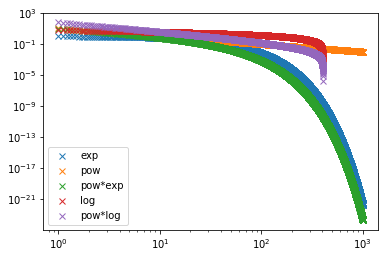

In [224]:
xxx = np.arange(1, 1000, 0.1)

yyy1 = exponential(xxx, -0.05, 1)
plt.plot(xxx, yyy1, 'x', label = 'exp')

yyy2 = power(xxx, 10, -1)
plt.plot(xxx, yyy2, 'x', label = 'pow')

yyy3 = yyy1 * yyy2
plt.plot(xxx, yyy3, 'x', label = 'pow*exp')

yyy4 = logarithm(xxx, -1, 6)
plt.plot(xxx, yyy4, 'x', label = 'log')

yyy5 = yyy4 * yyy2
plt.plot(xxx, yyy5, 'x', label = 'pow*log')

plt.yscale('log')
plt.xscale('log')
plt.legend(loc = 'lower left')

In [141]:
xxx

array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])

most promising are exponential and power law -> use both and see if results are similar!

In [190]:
# need to make configuration model from scratch

def configuration_model_nx(dd):
    graph = nx.Graph()
    
    

{'weight': 1}

In [ ]:
# to fit to degree distribution data

def custom_normal(x, avg, std, skew, kurt):
    return 0

Ask Tim Evans about fixing degree dist problem, 

Look for algorithms to solve problem.

Once file has been parsed, use networkx for further manipulation, shouldn't be reinvening the wheel!

In [194]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

a = np.array([4,2,7,4,8,7,5,45,22,1])

print(a[(a>3) * (a<7)])

[4 4 5]
